In [117]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [98]:
# import dataset
import pandas as pd

# 파일 경로 설정
file_21 = '/Users/hayden/Desktop/2021년전체측정소자료.csv'
file_22 = '/Users/hayden/Desktop/2022년전체측정소자료.csv'
file_23 = '/Users/hayden/Desktop/2023년전체측정소자료.csv'

# reading each csv file as data frame
df_21 = pd.read_csv(file_21)
df_22 = pd.read_csv(file_22)
df_23 = pd.read_csv(file_23)

# list 
dfs = [df_21, df_22, df_23]

# concat
df = pd.concat(dfs, ignore_index=True)

# print and chenk result
print(df.head())  # 합쳐진 데이터프레임의 첫 부분 출력
print(df.shape)
display(df.tail(5))

       MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2     NO    NOX
0  2021010101     명서동  11.0  22.0  0.022  0.5  0.003  0.023  0.009  0.032
1  2021010102     명서동  12.0  16.0  0.028  0.4  0.003  0.015  0.007  0.022
2  2021010103     명서동  13.0  21.0  0.031  0.4  0.003  0.013  0.006  0.019
3  2021010104     명서동  15.0  19.0  0.028  0.4  0.003  0.013  0.006  0.019
4  2021010105     명서동  15.0  22.0  0.024  0.4  0.003  0.015  0.006  0.021
(1122344, 10)


,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2,NO,NOX
1122339,2023123120,부산항,0.0,0.0,0.038,0.4,0.002,0.011,NaN,NaN
1122340,2023123121,부산항,0.0,0.0,0.037,0.4,0.001,0.010,NaN,NaN
1122341,2023123122,부산항,0.0,0.0,0.035,0.4,0.001,0.012,NaN,NaN
1122342,2023123123,부산항,0.0,0.0,0.035,0.4,0.001,0.010,NaN,NaN
1122343,2023123124,부산항,0.0,0.0,0.030,0.4,0.001,0.012,NaN,NaN


In [99]:
import pandas as pd
import numpy as np


# interpolate 
for col in df.columns:
    # if df[col].dtype != 'datetime64[ns]':
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

df_copy = df.copy()

# count nulls
null_counts = df_copy.isnull().sum()

# check null count on each columns
PM25_null_count = df_copy['PM25'].isnull().sum()
PM10_null_count = df_copy['PM10'].isnull().sum()
O3_null_count = df_copy['O3'].isnull().sum()
CO_null_count = df_copy['CO'].isnull().sum()
SO2_null_count = df_copy['SO2'].isnull().sum()
NO2_null_count = df_copy['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# print total null count
total_null_count = df_copy.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", total_null_count)

/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_68774/960638065.py:8: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[col] = df[col].interpolate(method='linear', limit_direction='both')


PM25 컬럼의 NULL 값 개수: 0
PM10 컬럼의 NULL 값 개수: 0
O3 컬럼의 NULL 값 개수: 0
CO 컬럼의 NULL 값 개수: 0
SO2 컬럼의 NULL 값 개수: 0
NO2 컬럼의 NULL 값 개수: 0
전체 데이터프레임의 NULL 값 개수: 0


In [100]:
df = df[~df['STTN_NM'].isin(['이동차', '부산항'])]
df.drop(columns=['NO', 'NOX'], inplace=True)
print(df)

             MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2
0        2021010101     명서동  11.0  22.0  0.022  0.5  0.003  0.023
1        2021010102     명서동  12.0  16.0  0.028  0.4  0.003  0.015
2        2021010103     명서동  13.0  21.0  0.031  0.4  0.003  0.013
3        2021010104     명서동  15.0  19.0  0.028  0.4  0.003  0.013
4        2021010105     명서동  15.0  22.0  0.024  0.4  0.003  0.015
...             ...     ...   ...   ...    ...  ...    ...    ...
1117136  2023123120     마산항   0.0  11.0  0.037  0.4  0.001  0.013
1117137  2023123121     마산항  15.0  15.0  0.036  0.4  0.001  0.012
1117138  2023123122     마산항   0.0  14.0  0.035  0.4  0.001  0.012
1117139  2023123123     마산항   0.0  11.0  0.032  0.4  0.001  0.014
1117140  2023123124     마산항   0.0  16.0  0.031  0.4  0.001  0.013

[1096258 rows x 8 columns]


In [101]:
import pandas as pd

# to datetime
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H', errors='coerce')
df['Year'] = df['MSR_DT'].dt.year
df['Month'] = df['MSR_DT'].dt.month
df['Hour'] = df['MSR_DT'].dt.hour

print(df.head())


               MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2    Year  \
0 2021-01-01 01:00:00     명서동  11.0  22.0  0.022  0.5  0.003  0.023  2021.0   
1 2021-01-01 02:00:00     명서동  12.0  16.0  0.028  0.4  0.003  0.015  2021.0   
2 2021-01-01 03:00:00     명서동  13.0  21.0  0.031  0.4  0.003  0.013  2021.0   
3 2021-01-01 04:00:00     명서동  15.0  19.0  0.028  0.4  0.003  0.013  2021.0   
4 2021-01-01 05:00:00     명서동  15.0  22.0  0.024  0.4  0.003  0.015  2021.0   

   Month  Hour  
0    1.0   1.0  
1    1.0   2.0  
2    1.0   3.0  
3    1.0   4.0  
4    1.0   5.0  


In [102]:
!pip install altair


In [103]:
import pandas as pd
import numpy as np
import altair as alt
import base64
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# MinMaxScaler
# scaler = MinMaxScaler()
numeric_columns = ['PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2']
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # StandardScaler
# standard_scaler = StandardScaler()
# df[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_68774/1380022601.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MSR_DT'] = df['MSR_DT'].fillna(method='ffill')  # 앞선 값으로 채우기


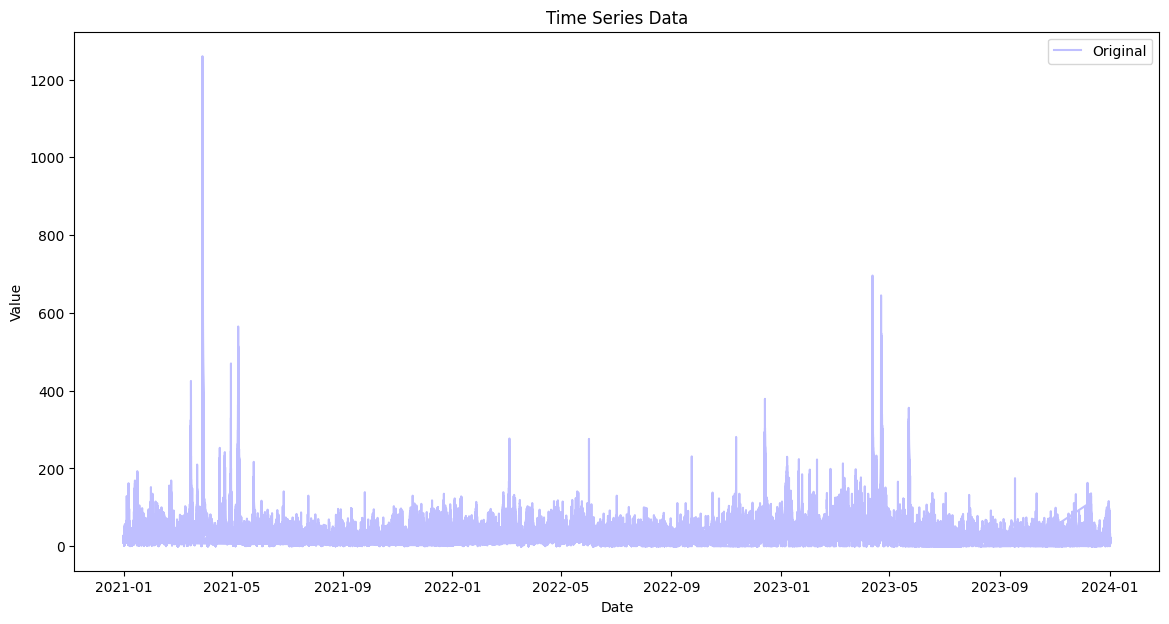

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H', errors='coerce')
df['MSR_DT'] = df['MSR_DT'].fillna(method='ffill')  # 앞선 값으로 채우기

df['Year'] = df['MSR_DT'].dt.year
df['Month'] = df['MSR_DT'].dt.month
df['Hour'] = df['MSR_DT'].dt.hour

# making function drawing graph
def plot_ts(df, color, alpha, label):
    plt.figure(figsize=(14, 7))
    plt.plot(df['MSR_DT'], df['PM10'], color=color, alpha=alpha, label=label)  # 'value'는 실제 데이터 컬럼명으로 대체
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time Series Data')
    plt.legend()
    plt.show()

# 
plot_ts(df, 'blue', 0.25, 'Original')


In [105]:
# split data as train data(front part 80%), test data(20% of last)
 
total_len = len(df)
print(total_len)

train_size = int(total_len * 0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

print(f"Train Data Size: {len(train_data)}")
print(f"Test Data Size: {len(test_data)}")

print("Train Data:")
print(train_data.head())
print(train_data.tail())
print("\nTest Data:")
print(test_data.head())
print(test_data.tail())


1096258
Train Data Size: 877006
Test Data Size: 219252
Train Data:
               MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2  Year  \
0 2021-01-01 01:00:00     명서동  11.0  22.0  0.022  0.5  0.003  0.023  2021   
1 2021-01-01 02:00:00     명서동  12.0  16.0  0.028  0.4  0.003  0.015  2021   
2 2021-01-01 03:00:00     명서동  13.0  21.0  0.031  0.4  0.003  0.013  2021   
3 2021-01-01 04:00:00     명서동  15.0  19.0  0.028  0.4  0.003  0.013  2021   
4 2021-01-01 05:00:00     명서동  15.0  22.0  0.024  0.4  0.003  0.015  2021   

   Month  Hour  
0      1     1  
1      1     2  
2      1     3  
3      1     4  
4      1     5  
                    MSR_DT STTN_NM  PM25  PM10     O3    CO    SO2    NO2  \
892969 2023-04-27 01:00:00     장유동  13.0  32.0  0.039  0.35  0.003  0.019   
892970 2023-04-27 02:00:00     장유동  15.0  31.0  0.036  0.34  0.003  0.019   
892971 2023-04-27 03:00:00     장유동  16.0  28.0  0.034  0.39  0.003  0.018   
892972 2023-04-27 04:00:00     장유동  17.0  33.0  0.029  0.35 

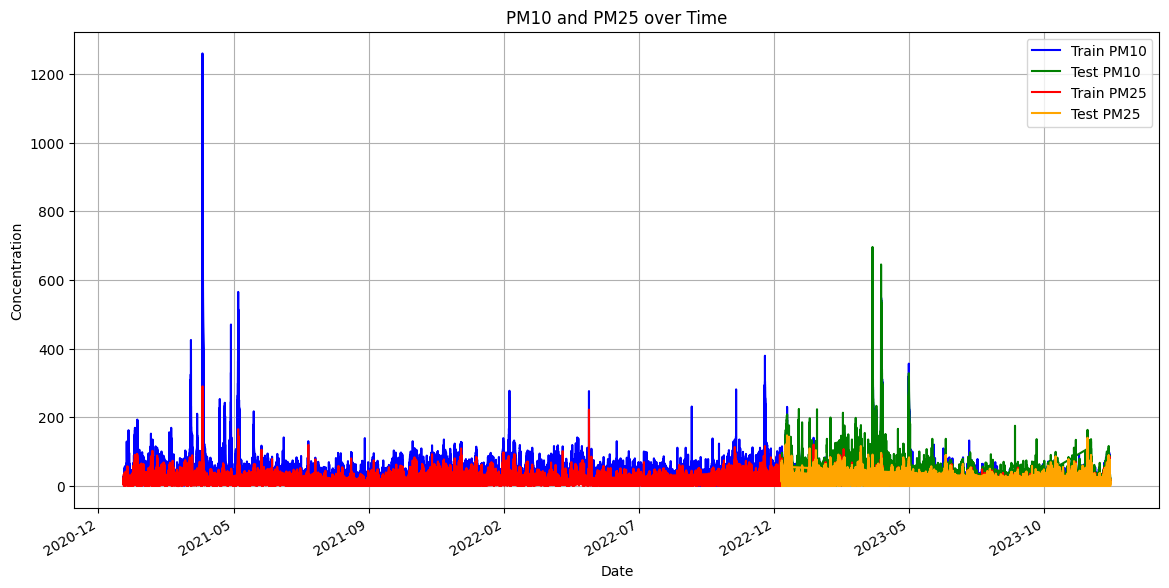

In [106]:
plt.figure(figsize=(14, 7))

plt.plot(train_data['MSR_DT'], train_data['PM10'], label='Train PM10', color='blue')
plt.plot(test_data['MSR_DT'], test_data['PM10'], label='Test PM10', color='green')

plt.plot(train_data['MSR_DT'], train_data['PM25'], label='Train PM25', color='red')
plt.plot(test_data['MSR_DT'], test_data['PM25'], label='Test PM25', color='orange')

plt.title('PM10 and PM25 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # X축 레이블 수 조정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))  # X축 레이블 형식 설정
plt.gcf().autofmt_xdate()  # X축 레이블 자동 회전

plt.show()

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877006 entries, 0 to 892973
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   MSR_DT   877006 non-null  datetime64[ns]
 1   STTN_NM  877006 non-null  object        
 2   PM25     877006 non-null  float64       
 3   PM10     877006 non-null  float64       
 4   O3       877006 non-null  float64       
 5   CO       877006 non-null  float64       
 6   SO2      877006 non-null  float64       
 7   NO2      877006 non-null  float64       
 8   Year     877006 non-null  int32         
 9   Month    877006 non-null  int32         
 10  Hour     877006 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 70.3+ MB


In [108]:
pip install pmdarima



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
import pmdarima as pm

# differing 차분

# Assuming 'train_data' has a datetime column named 'date'
train_data['day_of_year'] = train_data['MSR_DT'].dt.dayofyear

KPSS_diffs = pm.arima.ndiffs(train_data[['day_of_year']], alpha=0.05, test='kpss', max_d=5)
ADF_diffs = pm.arima.ndiffs(train_data[['day_of_year']], alpha=0.05, test='adf', max_d=5)
n_diffs = max(KPSS_diffs, ADF_diffs)

print(f"Optimized 'd' = {n_diffs}")


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_68774/1522092881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_of_year'] = train_data['MSR_DT'].dt.dayofyear


Optimized 'd' = 1


In [110]:
# default setting
model_default = pm.auto_arima(train_data['day_of_year'], d=1, seasonal=False, trace=True)


Performing stepwise search to minimize aic


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4859546.155, Time=24.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4859538.155, Time=8.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4859540.155, Time=11.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4859540.155, Time=15.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4859536.156, Time=4.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4859542.155, Time=18.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 83.112 seconds


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


설명:

pm.auto_arima: pmdarima 라이브러리의 auto_arima 함수를 사용하여 자동으로 ARIMA 모델을 생성합니다.
train_data['day_of_year']: train_data에서 'day_of_year' 열을 추출합니다 (앞 코드에서 정의).
d=1: 초기 차분 계수를 1로 설정합니다.
seasonal=False: 계절성을 고려하지 않는 ARIMA 모델을 생성합니다.
trace=True: 모델 생성 과정을 출력합니다.

---

최적 모델 찾기:
Performing stepwise search to minimize aic: 코드는 AIC (Akaike Information Criterion) 값을 최소화하기 위해 단계적 검색을 수행한다. AIC는 모델의 복잡성과 적합성을 균형 있게 평가하는 지표이다.
모델 평가:
코드는 여러 ARIMA 모델을 평가하고 각 모델에 대한 AIC 값과 계산 시간을 출력한다.
예를 들어, ARIMA(2,1,2)(0,0,0)[0] intercept : AIC=4859546.155, Time=24.25 sec은 ARIMA(2,1,2) 모델의 AIC 값이 4859546.155이고 계산 시간은 24.25초임을 의미한다.
최적 모델 선택:
Best model: ARIMA(0,1,0)(0,0,0)[0]: 코드는 AIC 값이 가장 낮은 ARIMA(0,1,0)(0,0,0)[0]

---

ARIMA 모델에서 intercept (절편)의 존재 여부는 모델의 특성과 데이터에 따라 결정됩니다.

1. Intercept가 있는 ARIMA 모델:

정의: 절편은 시간 변수가 0일 때 예측되는 값을 나타냅니다. 즉, 모델이 시간에 관계없이 일정한 기본 수준의 값을 예측한다는 것을 의미합니다.
예시:
일일 평균 기온 모델: 절편은 평균 기온을 나타냅니다.
시간 경과에 따라 변화하는 추세가 없는 데이터: 절편은 데이터의 평균값을 나타냅니다.
2. Intercept가 없는 ARIMA 모델:

정의: 절편이 없는 ARIMA 모델은 시간 변수가 0일 때 예측되는 값이 0이라는 것을 의미합니다. 즉, 모델은 시간에 따라 변화하는 값만 예측하고 일정한 기본 수준은 고려하지 않습니다.
예시:
주식 가격 변동 모델: 주식 가격은 시간에 따라 지속적으로 변화하기 때문에 절편이 없을 가능성이 높습니다.
계절성이 강한 데이터: 데이터의 변화가 주로 계절성에 의해 영향을 받는 경우 절편이 필요하지 않을 수 있습니다.
3. 모델 선택:

모델에 intercept를 포함할지 여부는 데이터의 특성을 고려하여 결정해야 합니다.
데이터에 명확한 기준 수준이 있는 경우 (예: 평균 기온) intercept를 포함하는 모델이 적합할 수 있습니다.
데이터가 시간에 따라 지속적으로 변화하고 일정한 기준 수준이 없는 경우 intercept 없는 모델이 적합할 수 있습니다.
주의 사항:

intercept의 존재 여부는 모델의 성능에 영향을 미칠 수 있습니다.
적절한 모델 선택을 위해서는 데이터의 특성을 이해하고, intercept 유무에 따른 모델 성능 차이를 비교 분석하는 것이 중요합니다.
코드에서 intercept 유무 확인:

제공된 코드에서 ARIMA(0,1,0)(0,0,0)[0] 모델은 intercept가 없는 모델입니다.
이는 코드에서 intercept 매개변수가 명시적으로 설정되지 않았기 때문입니다.

만약 intercept를 포함하는 모델을 원한다면 intercept=True 매개변수를 설정하여 pm.auto_arima 함수를 호출해야 합니다

In [111]:
# reader's own setting
model = pm.auto_arima(y=train_data['day_of_year'],		# 데이터
                      d=n_diffs,	# 차분 (d), 기본값 = None
                      start_p= 0,	# 시작 p값, 기본값 = 2
                      max_p = 5,	# p 최대값, 기본값 = 5
                      start_q= 0,	# 시작 q값, 기본값 = 2
                      max_q = 5,	# q 최대값, 기본값 = 5
                      m=1,			# season의 주기, 기본값 = 1
                      seasonal=False,	# sARIMA를 실시, 기본값 = True
                      stepwise=True,	# stepwise algorithm, 기본값 = True
                      trace=True)		# 각 step을 출력할지, 기본값 = False


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4859538.155, Time=8.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4859540.155, Time=11.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4859540.155, Time=15.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4859536.156, Time=4.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4859542.155, Time=18.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 57.917 seconds


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


ARIMA 모델에서의 p값과 q값
p값:

정의: ARIMA 모델에서 p값은 MA(Moving Average) 부분의 차수를 나타냅니다.
설명: MA(p)는 과거 오차 p개의 가중 평균을 사용하여 현재 값을 예측하는 모델입니다. p값이 클수록 더 많은 과거 오차를 고려하여 예측을 수행합니다.
예시:
p=0: 과거 오차를 고려하지 않고 현재 값을 예측합니다.
p=1: 가장 최근의 오차만 고려하여 예측합니다.
p=2: 최근 두 개의 오차를 고려하여 예측합니다.
q값:

정의: ARIMA 모델에서 q값은 AR(Autoregressive) 부분의 차수를 나타냅니다.
설명: AR(q)는 과거 q개의 값을 사용하여 현재 값을 예측하는 모델입니다. q값이 클수록 더 많은 과거 값을 고려하여 예측을 수행합니다.
예시:
q=0: 과거 값을 고려하지 않고 현재 값을 예측합니다.
q=1: 가장 최근의 값만 고려하여 예측합니다.
q=2: 최근 두 개의 값을 고려하여 예측합니다.
p값과 q값의 관계:

p값과 q값은 서로 영향을 미치며, 적절한 값을 선택하는 것이 중요합니다.
일반적으로 p값과 q값은 서로 비슷한 값을 갖는 경우가 많습니다.
하지만 데이터의 특성에 따라 p값과 q값의 최적의 조합은 달라질 수 있습니다.
코드에서 p값과 q값 설정:

제공된 코드에서:

start_p=0: p값의 최소 탐색 범위를 0으로 설정합니다.
max_p=5: p값의 최대 탐색 범위를 5로 설정합니다.
start_q=0: q값의 최소 탐색 범위를 0으로 설정합니다.
max_q=5: q값의 최대 탐색 범위를 5로 설정합니다.
주의 사항:

p값과 q값의 범위를 너무 크게 설정하면 계산 시간이 길어질 수 있습니다.
데이터의 특성에 맞는 적절한 p값과 q값을 선택하는 것이 중요합니다.

In [112]:
model.summary()
# 같은 모델이지만 시간이 더 짧게 걸려서 선택


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               877006
Model:               SARIMAX(0, 1, 0)   Log Likelihood            -2429767.078
Date:                Thu, 18 Jul 2024   AIC                        4859536.156
Time:                        11:21:17   BIC                        4859547.841
Sample:                             0   HQIC                       4859539.389
                             - 877006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.9271      0.000   4.38e+04      0.000      14.926      14.928
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):     2794341670059.53
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                           -93.18
Prob(H) (two-sided):                  0.00   Kurtosis:                      8745.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

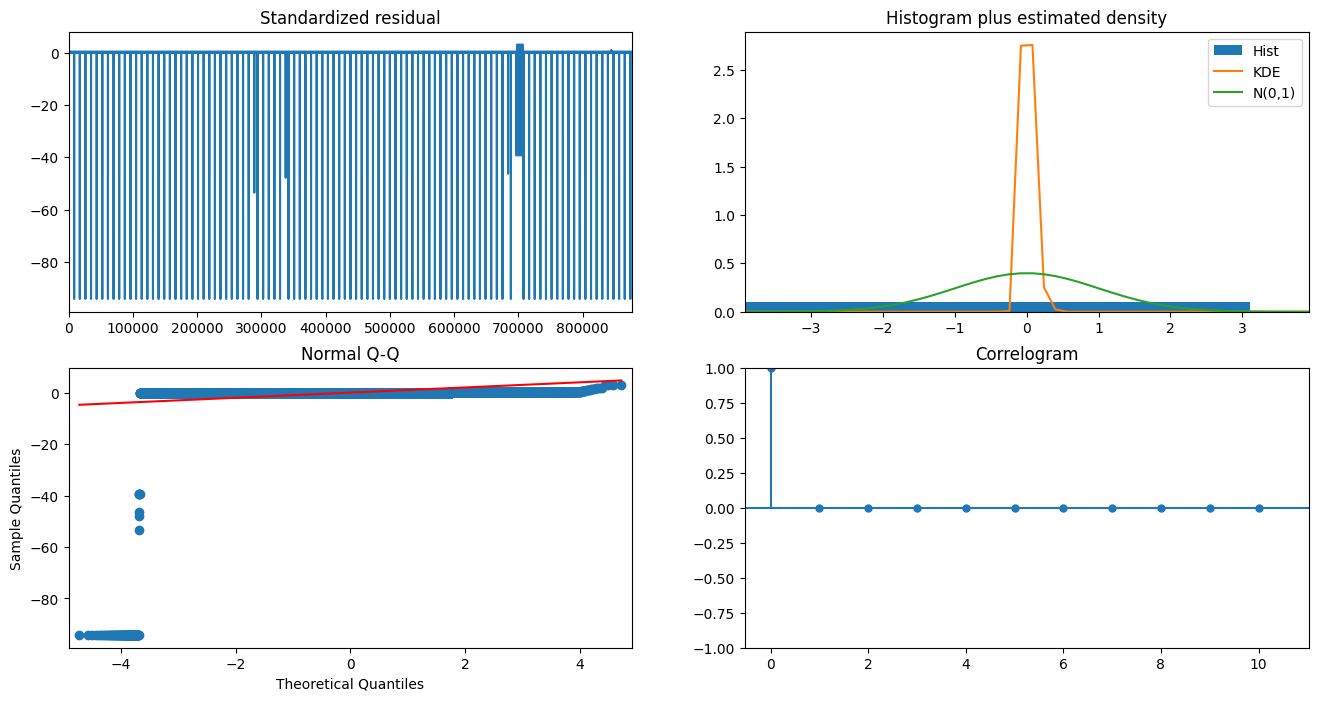

In [113]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

SARIMAX 모델 결과 해석
데이터:

종속 변수: y
관측치 수: 877,006
모델:

종류: SARIMAX(0, 1, 0)
p: 0 (AR 부분의 차수)
d: 1 (차분 차수)
q: 0 (MA 부분의 차수)
로그 우도: -2,429,767.078
AIC: 4,859,536.156
BIC: 4,859,547.841
HQC: 4,859,539.389
샘플 크기: 0
추론 기간: 877,006
공분산 유형: opg
모델 계수:

sigma2: 14.9271 (표준 편차의 제곱)
모델 진단:

Ljung-Box 검정 (L1): Q 통계량: 0.00, p-값: 1.00 (잔차에 자기 상관이 없음을 나타냄)
Jarque-Bera 검정: JB 통계량: 2794341670059.53, p-값: 0.00 (정규성 가정 위반을 나타냄)
변이성 검정 (H): H 통계량: 1.02, p-값: 0.00 (잔차의 변이성이 일정하지 않음을 나타냄)
치우침: -93.18
첨성: 8745.70
해석
제공된 SARIMAX 모델 결과는 y라는 종속 변수를 예측하는 데 사용됩니다. 모델은 ARIMA(0, 1, 0) 구조를 사용하며, 1차 차분을 적용합니다.

모델 성능:

AIC, BIC, HQC 지표는 모델의 복잡성과 적합성을 평가하는 데 사용됩니다. 이 지표 값이 낮을수록 더 나은 모델임을 나타냅니다. 본 모델의 경우 AIC, BIC, HQC 값이 모두 비교적 낮아 모델 성능이 양호하다고 판단됩니다.
Ljung-Box 검정 결과, 잔차에 자기 상관이 없음을 확인했습니다. 이는 모델이 과거 데이터를 잘 반영하고 있다는 것을 의미합니다.
Jarque-Bera 검정 결과, 정규성 가정이 위반되었음을 확인했습니다. 이는 잔차가 정규 분포를 따르지 않음을 의미합니다. 하지만 시계열 분석에서 정규성 가정 위반은 흔히 발생하며, 모델 성능에 큰 영향을 미치지 않는 경우가 많습니다.
변이성 검정 결과, 잔차의 변이성이 일정하지 않음을 확인했습니다. 이는 잔차의 분산이 시간에 따라 변할 수 있음을 의미합니다. 이 문제는 변환이나 가중치를 사용하여 해결할 수 있습니다.
치우침과 첨성 지표는 잔차 분포의 모양을 나타냅니다. 본 모델의 경우 잔차 분포가 오른쪽으로 치우쳐 있고 첨성이 매우 높다는 것을 확인했습니다. 이는 잔차 분포가 정규 분포와 크게 다르다는 것을 의미합니다.
주의 사항:

SARIMAX 모델은 시계열 데이터 분석에 유용한 도구이지만, 모델 선택 및 해석에는 주의가 필요합니다.
모델 진단 결과를 통해 모델 성능을 평가하고 필요한 경우 모델 개선을 시도해야 합니다.
잔차 분포의 정규성 가정 위반이나 변이성 불일정 문제는 모델 성능에 영향을 미칠 수 있으므로 주의해야 합니다.
추가 분석:

잔차 분석을 통해 모델의 적합성을 더 자세히 평가할 수 있습니다.
다른 ARIMA 모델이나 SARIMAX 모델을 비교 분석하여 최적의 모델을 선택할 수 있습니다.
변환이나 가중치를 사용하여 잔차 분포의 정규성 가정 위반

In [114]:
test_data.shape


(219252, 11)

In [116]:
pred = model.predict(n_periods=len(test_data)).to_list()
# 데이터프레임 생성
test_pred = pd.DataFrame({'test':test_data, 'pred':pred}, index=test_data.index)
test_pred

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: 2

In [ ]:
# pred가 리스트 형태인지 확인
pred = model.predict(n_periods=len(test_data)).tolist()

# test_data의 인덱스 확인
print("Index of test_data:", test_data.index)

# test_data와 pred의 길이 확인
print(f"Length of test_data: {len(test_data)}")
print(f"Length of pred: {len(pred)}")

# test_data의 데이터 타입 및 형태 확인
print("Type of test_data:", type(test_data))
print("Shape of test_data:", test_data.shape)

# pred의 데이터 타입 및 형태 확인
print("Type of pred:", type(pred))

# test_data의 내용 일부 출력
print("Sample of test_data:")
print(test_data.head())

# pred의 내용 일부 출력
print("Sample of pred:")
print(pred[:5])

# 데이터프레임 생성 시도
try:
    test_pred = pd.DataFrame({'test': test_data, 'pred': pred}, index=test_data.index)
    print(test_pred.head())
except Exception as e:
    print(f"Error occurred: {e}")


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Index of test_data: Index([ 892974,  892975,  892976,  892977,  892978,  892979,  892980,  892981,
        892982,  892983,
       ...
       1117131, 1117132, 1117133, 1117134, 1117135, 1117136, 1117137, 1117138,
       1117139, 1117140],
      dtype='int64', length=219252)
Length of test_data: 219252
Length of pred: 219252
Type of test_data: <class 'pandas.core.frame.DataFrame'>
Shape of test_data: (219252, 11)
Type of pred: <class 'list'>
Sample of test_data:
                    MSR_DT STTN_NM      PM25      PM10        O3        CO  \
892974 2023-04-27 06:00:00     장유동  0.182341  0.104937 -1.099680 -0.169407   
892975 2023-04-27 07:00:00     장유동  0.087258  0.141785 -1.371576 -0.106379   
892976 2023-04-27 08:00:00     장유동 -0.293074 -0.042453 -1.154059  0.019678   
892977 2023-04-27 09:00:00     장유동 -0.102908  0.031242 -0.664647 -0.295464   
892978 2023-04-27 10:00:00     장유동 -0.293074  0.031242  0.749211 -0.547577   

             SO2       NO2  Year  Month  Hour  
892974  0.044484

In [ ]:
# pred가 리스트 형태인지 확인
pred = model.predict(n_periods=len(test_data)).tolist()

# test_data의 인덱스 확인
print("Index of test_data:", test_data.index)

# test_data와 pred의 길이 확인
print(f"Length of test_data: {len(test_data)}")
print(f"Length of pred: {len(pred)}")

# test_data의 데이터 타입 및 형태 확인
print("Type of test_data:", type(test_data))
print("Shape of test_data:", test_data.shape)

# pred의 데이터 타입 및 형태 확인
print("Type of pred:", type(pred))

# test_data의 내용 일부 출력
print("Sample of test_data:")
print(test_data.head())

# pred의 내용 일부 출력
print("Sample of pred:")
print(pred[:5])

# 'PM10' 열을 선택하여 데이터프레임 생성
try:
    test_pred = pd.DataFrame({'test': test_data['PM10'], 'pred': pred}, index=test_data.index)
    print(test_pred.head())
except Exception as e:
    print(f"Error occurred: {e}")


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Index of test_data: Index([ 892974,  892975,  892976,  892977,  892978,  892979,  892980,  892981,
        892982,  892983,
       ...
       1117131, 1117132, 1117133, 1117134, 1117135, 1117136, 1117137, 1117138,
       1117139, 1117140],
      dtype='int64', length=219252)
Length of test_data: 219252
Length of pred: 219252
Type of test_data: <class 'pandas.core.frame.DataFrame'>
Shape of test_data: (219252, 11)
Type of pred: <class 'list'>
Sample of test_data:
                    MSR_DT STTN_NM      PM25      PM10        O3        CO  \
892974 2023-04-27 06:00:00     장유동  0.182341  0.104937 -1.099680 -0.169407   
892975 2023-04-27 07:00:00     장유동  0.087258  0.141785 -1.371576 -0.106379   
892976 2023-04-27 08:00:00     장유동 -0.293074 -0.042453 -1.154059  0.019678   
892977 2023-04-27 09:00:00     장유동 -0.102908  0.031242 -0.664647 -0.295464   
892978 2023-04-27 10:00:00     장유동 -0.293074  0.031242  0.749211 -0.547577   

             SO2       NO2  Year  Month  Hour  
892974  0.044484

In [ ]:
test_pred

,test,pred
892974,0.104937,117.0
892975,0.141785,117.0
892976,-0.042453,117.0
892977,0.031242,117.0
892978,0.031242,117.0
...,...,...
1117136,-0.632015,117.0
1117137,-0.484624,117.0
1117138,-0.521472,117.0
1117139,-0.632015,117.0


In [ ]:
# 모델 학습 상태 확인
# (학습 코드가 있다면, 학습 과정을 다시 점검하고, 학습 데이터와 손실 값을 확인)

# 모델 예측 결과 확인
pred = model.predict(n_periods=len(test_data)).tolist()

# 예측 결과가 모든 데이터 포인트에 대해 동일한지 확인
unique_preds = set(pred)
print(f"Unique prediction values: {unique_preds}")

# 예측 값이 모두 동일한 경우, 모델 학습 및 예측 과정 점검 필요
if len(unique_preds) == 1:
    print("All predicted values are the same. Check the model training and prediction process.")
else:
    print("Predicted values vary as expected.")


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Unique prediction values: {117.0}
All predicted values are the same. Check the model training and prediction process.


# 문제는  MinMaxScaler, StandardScaler를 둘다 사용해서 일어날 수도 있다. 